# AM2061 Algorithm 2-1
## The Bisection Method

The Bisection Method is an algoritm used to determine the roots of Non-linear functions. 

It uses the Intermediate Value Theorem (and a special case of it, Bolzanos Theorem) to prove that a root lies within a given range $\left[ a, b \right]$.

A brief explanation is as follows:

* Assuming we know a root of the function $f$ lies within the range of the two points $a$ and $b$ (such that $a < b$), we can find the midpoint $p$ of $a$ and $b$ as follows:
\begin{equation} p = \frac{b - a}{2} \end{equation}


* Now, say we pass $a$, $b$, and $p$ through our desired function $f$, such that we get the y-values $f(a)$, $f(b)$, $f(p)$.  
Since we say the root is between $a$ and $b$, then $f(a)$ and $f(b)$ must have opposite signs.


* By comparing the signs of these y-values, we can determine which range $\left[ a, p \right]$ or $\left[ p, b \right]$ the root lies in. Note that we want the y-values of our **new** $a$ and $b$ to have opposite signs so the root is between them:
  * If $f(a)f(p) > 0$, then they have the same sign, so the root is in the range $\left[ p, b \right]$. We move $a$ to $p$, then repeat the procedure.  
    * Otherwise, (so if $f(a)f(p) < 0$) then they have the opposite sign, the root is in the range $\left[ a, p \right]$. We move $b$ to $p$, then repeat the procedure.
    
* We repeat this procedure until either:
  * $f(p) = 0$, so we have found the root exactly. (successful state)
  * $p = \frac{b - a}{2} < ERR$, so we have found the root within the allowed error. (successful state)
  * At max number of iterations. (unsuccessful state)

The following is the pseudocode provided:

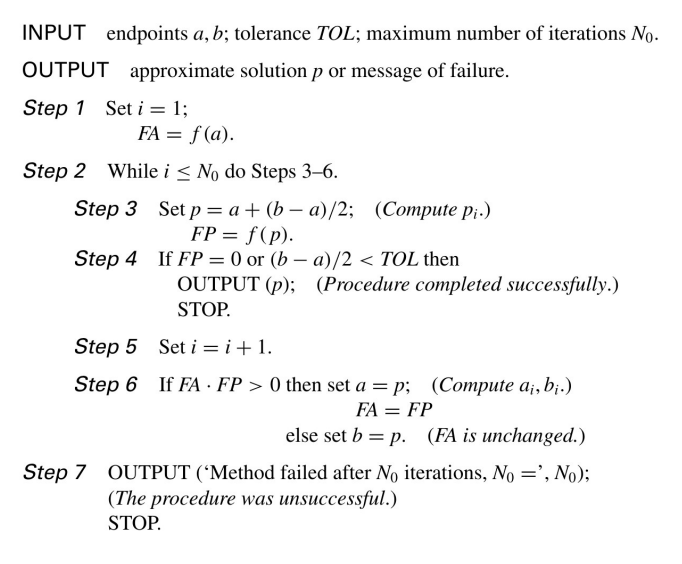

Let us now create this in Python.

First we must define a function, note that any function can be used, for simplicity I will use a quadratic:

In [33]:
def functionUsed(x):
    f = x**2 - 3*x + 2
    return f

Now let us define the algorithm, we will need the start and end positions, the function, the allowed error, and the max number of iterations.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [34]:
def BisectionMethod(a, b, func, ERR, N):
    i = 1
    FA = func(a)
    
    while i <= N: # while not at max iterations
        p = a + (b - a) / 2 # midpoint between a and b
        FP = func(p)
        
        if FP == 0 or (b - a) / 2 < ERR: # if at root or if a and b are within tolerance
            print(f"Root = {p}")
            print("Procedure completed successfully.")
            break # ends while loop
            
        if FA * FP > 0: # bisection method moves a to p if theyre product is positive
            a = p
            FA = FP
        else: # otherwise moves b to p
            b = p 
            #FP is unchanged
            
        i += 1
    
    if i > N:
        print(f"Method failed after {N} iterations.")
        print("Procedure was unsuccessful.")

We can now test this algorithm for a root. This quadratic has actual roots of x = 1 and x = 2. Note that for a simple function such as this we can get really close to the actual answer with a small amount of iterations!

In [40]:
BisectionMethod(0.934, 1.223, functionUsed, 0.000000000000001, 100)

Root = 0.9999999999999997
Procedure completed successfully.


We can now simply move our starting point closer to the other root to find it:

In [37]:
BisectionMethod(1.876, 2.567, functionUsed, 0.000000000000001, 100)

Root = 2.0
Procedure completed successfully.


The following is what a failed procedure looks like (note used a very small number of iterations):

In [38]:
BisectionMethod(1.876, 2.567, functionUsed, 0.000000000000001, 10)

Method failed after 10 iterations.
Procedure was unsuccessful.
